# STA 208: Homework 2     

## (due Wednesday, May 8 - see submission instructions on Canvas)

# 2. Data Analysis

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, lars_path, LogisticRegression, LassoLars
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('ggplot')
%matplotlib inline
# dataset path
data_dir = "."          # <=== modify according to your setting, if needed

Load the following dataset that is a modified version of the "bodyfat" data set from DASL [Data and Story Library] (https://dasl.datadescription.com/), which consists of measurements on 250 male persons. However, some variables from the original dataset are dropped and some irrelevant columns have been added to increase the number of the predictors. 

In [62]:
# Importing data from local machine
bodyfat = pd.read_csv(data_dir+'/HW2.csv')

In [63]:
bodyfat.head()

,Pct.BF,Age,Weight,Height,Neck,Chest,Hip,Thigh,Knee,Ankle,...,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12
0,12.3,23,154.25,67.75,36.2,93.1,94.5,59.0,37.3,21.9,...,1.98,1.44,-0.19,0.38,-1.21,-0.19,0.81,-0.74,0.92,0.63
1,6.1,22,173.25,72.25,38.5,93.6,98.7,58.7,37.3,23.4,...,-1.38,0.90,0.34,1.27,0.57,0.94,0.34,-2.39,-0.59,-0.98
2,25.3,22,154.00,66.25,34.0,95.8,99.2,59.6,38.9,24.0,...,-0.09,0.37,1.15,-0.67,-1.28,0.86,0.63,0.14,-1.97,-0.16
3,10.4,26,184.75,72.25,37.4,101.8,101.2,60.1,37.3,22.8,...,0.85,0.59,0.46,0.63,2.03,0.98,-0.56,-1.44,0.13,-0.58
4,28.7,24,184.25,71.25,34.4,97.3,101.9,63.2,42.2,24.0,...,-1.03,0.41,-0.33,-0.77,-0.49,-0.35,-0.28,0.27,-0.38,0.51


The goal of the following two subprojects are (i) to predict percent bodyfat from the other measurements (in part 2.1), and (ii) to classify the data according to a categorized version of age (in part 2.2). First we generate the two responses and the predictors:

In [64]:
## Our responses are "Pct.BF" and a categorized version of "Age" ("larger than 45" = 1 and "smaller than 45 = 0)
## The responses for prediction and classification are y and y1, respectively.

y = bodyfat['Pct.BF'].values
y1 = bodyfat['Age'].values > 45
y1 = y1.astype(int)

X = bodyfat.drop(['Pct.BF','Age'],axis=1).values

## Just checking (there should be 23 variables in X and 250 cases) ...

print(np.shape(X))
print(np.shape(y))
print(np.shape(y1))

(250, 23)
(250,)
(250,)


__Exercise 2.1__ (15 pts) Perform ridge regression on the data and cross-validate to find the best ridge parameter.

In [65]:
np.random.seed(42)

# Standardize the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ridge regression with cross-validation for different alpha values
alphas = np.logspace(-4, 4, 1000) # 10^-4 to 10^4
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_scaled, y)

# Best alpha found
best_alpha = ridge_cv.alpha_

# Prediction and evaluation
y_pred = ridge_cv.predict(X_scaled)
mse = mean_squared_error(y, y_pred)

print(f"Best ridge alpha: {best_alpha}")
print(f"Ridge MSE: {mse}")

Best ridge alpha: 26.880010215376075
Ridge MSE: 28.103690252425064


__Conclusion:__ Through the cross valication, we find the best ridge parameter alpha is 26.8, and the mse of prediction is 28.1.

__Exercise 2.2__ (15 pts) Plot the lasso and lars path for each of the coefficients.  All coefficients for a given method should be on the same plot, you should get 2 plots.  What are the major differences, if any?  Are there any 'leaving' events in the lasso path?

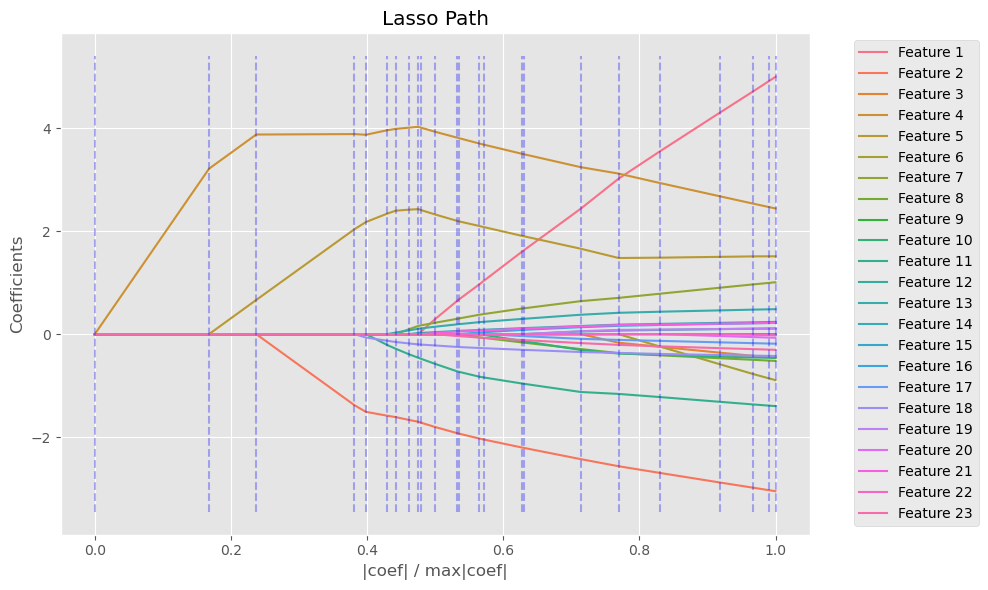

In [66]:
# Generate unique colors for each feature
n_features = X.shape[1]
palette = sns.color_palette("husl", n_features) # Using "husl" palette for distinct hues

# Compute Lasso path
alphas_lasso, _, coefs_lasso = lars_path(X_scaled, y, method="lasso")

# Summing and normalizing coefficients
xx = np.sum(np.abs(coefs_lasso.T), axis=1)
xx /= xx[-1]

# Plotting
plt.figure(figsize=(10, 6))

for i in range(n_features):
    plt.plot(xx, coefs_lasso[i, :], label=f"Feature {i+1}", color=palette[i])

# Adding vertical dashed lines
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed", color="blue", alpha=0.3)

# Labels and finishing
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("Lasso Path")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


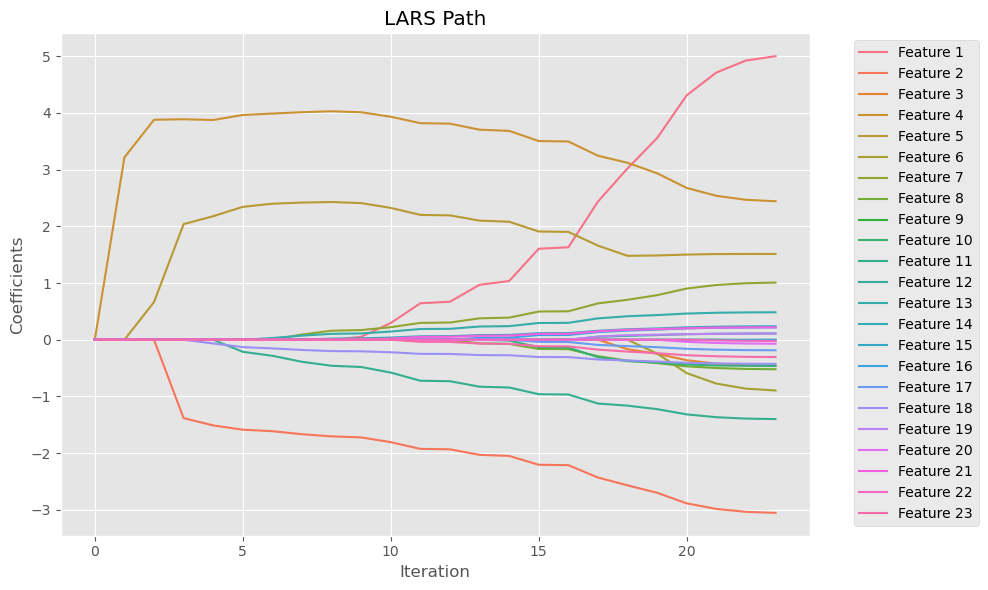

In [67]:
# Function to compute and plot the LARS path
def plot_lars_path(X, y):
    _, _, coefs_lars = lars_path(X, y, method="lars")
    n_features = coefs_lars.shape[0]
    palette = sns.color_palette("husl", n_features)  # Generate unique colors

    plt.figure(figsize=(10, 6))
    for i in range(n_features):
        plt.plot(np.arange(coefs_lars.shape[1]), coefs_lars[i, :], label=f"Feature {i+1}", color=palette[i])

    plt.xlabel("Iteration")
    plt.ylabel("Coefficients")
    plt.title("LARS Path")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    plt.show()

# Plot LARS path
plot_lars_path(X_scaled, y)

__Conclusion:__ 
The Lasso path plot demonstrates how coefficients evolve as regularization decreases, shown by their progression from right to left on the x-axis scaled by |coef| / max|coef|. Initially, most coefficients are zero, highlighting Lasso’s capacity for sparsity. As the regularization lessens, select coefficients diverge from zero and increase, indicating their strong predictive value. There is no 'leaving' events, once coefficients become active, they do not revert to zero. Notably, features such as Feature 1 and Feature 2 show significant growth, underscoring their robust relationship with the response variable.

Conversely, the LARS path plot depicts a dynamic and targeted activation of coefficients, which are introduced sharply and adjusted continuously based on their correlation with the residual. This method provides a detailed sequential visualization of each feature's impact, with early prominent features like Feature 1 and Feature 2 indicating strong correlations. LARS consistently adjusts coefficients, reflecting its flexibility in adapting the model as new features are introduced, and like Lasso, it does not show 'leaving' events, ensuring all coefficients remain active once included.

The key difference between Lasso and LARS is their coefficient management—Lasso ensures a smoother coefficient transition due to the L1 penalty, ideal for feature reduction and simplicity. LARS offers detailed insight into how each feature affects the model through sequential inclusion, useful for understanding model dynamics. Lasso generally results in sparser models than LARS, particularly at higher penalties, underscoring its utility in reducing model complexity and enhancing interpretability.

__Exercise 2.3__ (15 pts) Cross-validate the Lasso and compare the results to the answer to 2.1.

In [68]:
# Lasso cross-validation
lasso_cv = LassoCV(cv=10, random_state=42)
lasso_cv.fit(X_scaled, y)

# Best alpha found
best_alpha_lasso = lasso_cv.alpha_

# Prediction and evaluation
y_pred_lasso = lasso_cv.predict(X_scaled)
mse_lasso = mean_squared_error(y, y_pred_lasso)

print(f"Best lasso alpha: {best_alpha_lasso}")
print(f"LASSO MSE: {mse_lasso}")

Best lasso alpha: 0.5799719745623706
LASSO MSE: 31.163952573828457


__Conclusion:__ The optimal alpha values for Ridge (26.9) and Lasso (0.58) are quite different, with Ridge choosing a much higher alpha. This suggests that Ridge might be preferring a model with more regularization compared to Lasso in this scenario. The MSE for Lasso (31.2) is higher than for Ridge (28.1), indicating that in this specific dataset, Ridge regression performs better in terms of minimizing the mean squared error on the training data. The lower performance of Lasso might be indicative of its stronger penalty on coefficients, leading to a more sparse solution that doesn't capture as much complexity or variability in the data as Ridge. Conversely, the relatively lower alpha and higher error in Lasso might suggest that the dataset requires a model that retains more features or interactions to effectively predict outcomes.

__Exercise 2.4__ (20 pts) Obtain the 'best' active set from 2.3, and create a new design matrix with only these variables.  Use this to predict the categorical variable y1 with logistic regression. Try different regularization methods and a range of penalty parameters ([see sklearn documentation](https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)). 
Briefly summarize the performance of the methods after having observed confusion matrices for different methods.

In [76]:
# Getting the active features from Lasso coefficients
active_features = np.where(lasso_cv.coef_ != 0)[0]

# Creating the new design matrix
X_active = X_scaled[:, active_features]

# Splitting into training and test sets
X_train, X_test, y1_train, y1_test = train_test_split(X_active, y1, test_size=0.2, random_state=42)

C_values = np.logspace(-4, 4, 10)  # From 10^-4 to 10^4

# Trying different regularization methods and penalties
methods = ['l1', 'l2', 'elasticnet']
results = {}

for method in methods:
    # LogisticRegressionCV automatically performs cross-validation
    if method == 'elasticnet':
        model = LogisticRegressionCV(Cs=C_values, cv=5, penalty='elasticnet', solver='saga', l1_ratios=[0.1, 0.5, 0.9], max_iter=1000, random_state=42)
    else:
        model = LogisticRegressionCV(Cs=C_values, cv=5, penalty=method, solver='saga', max_iter=1000, random_state=42)

    # Fitting the model
    model.fit(X_train, y1_train)

    # Best C and potentially best l1_ratio found
    best_C = model.C_[0]  # Best C value
    best_l1_ratio = model.l1_ratio_[0] if method == 'elasticnet' else None

    # Predictions and evaluation
    y1_pred = model.predict(X_test)
    accuracy = accuracy_score(y1_test, y1_pred)
    conf_matrix = confusion_matrix(y1_test, y1_pred)

    results[method] = {
        'accuracy': accuracy, 
        'conf_matrix': conf_matrix, 
        'best_C': best_C, 
        'best_l1_ratio': best_l1_ratio if method == 'elasticnet' else 'N/A'
    }

# Display results
for method, info in results.items():
    print(f"Method: {method}, Best C: {info['best_C']}, Best L1 Ratio: {info['best_l1_ratio']}, Accuracy: {info['accuracy']}")
    print(f"Confusion Matrix:\n{info['conf_matrix']}\n")

Method: l1, Best C: 21.54434690031882, Best L1 Ratio: N/A, Accuracy: 0.68
Confusion Matrix:
[[22 10]
 [ 6 12]]

Method: l2, Best C: 21.54434690031882, Best L1 Ratio: N/A, Accuracy: 0.68
Confusion Matrix:
[[22 10]
 [ 6 12]]

Method: elasticnet, Best C: 0.3593813663804626, Best L1 Ratio: 0.9, Accuracy: 0.68
Confusion Matrix:
[[23  9]
 [ 7 11]]



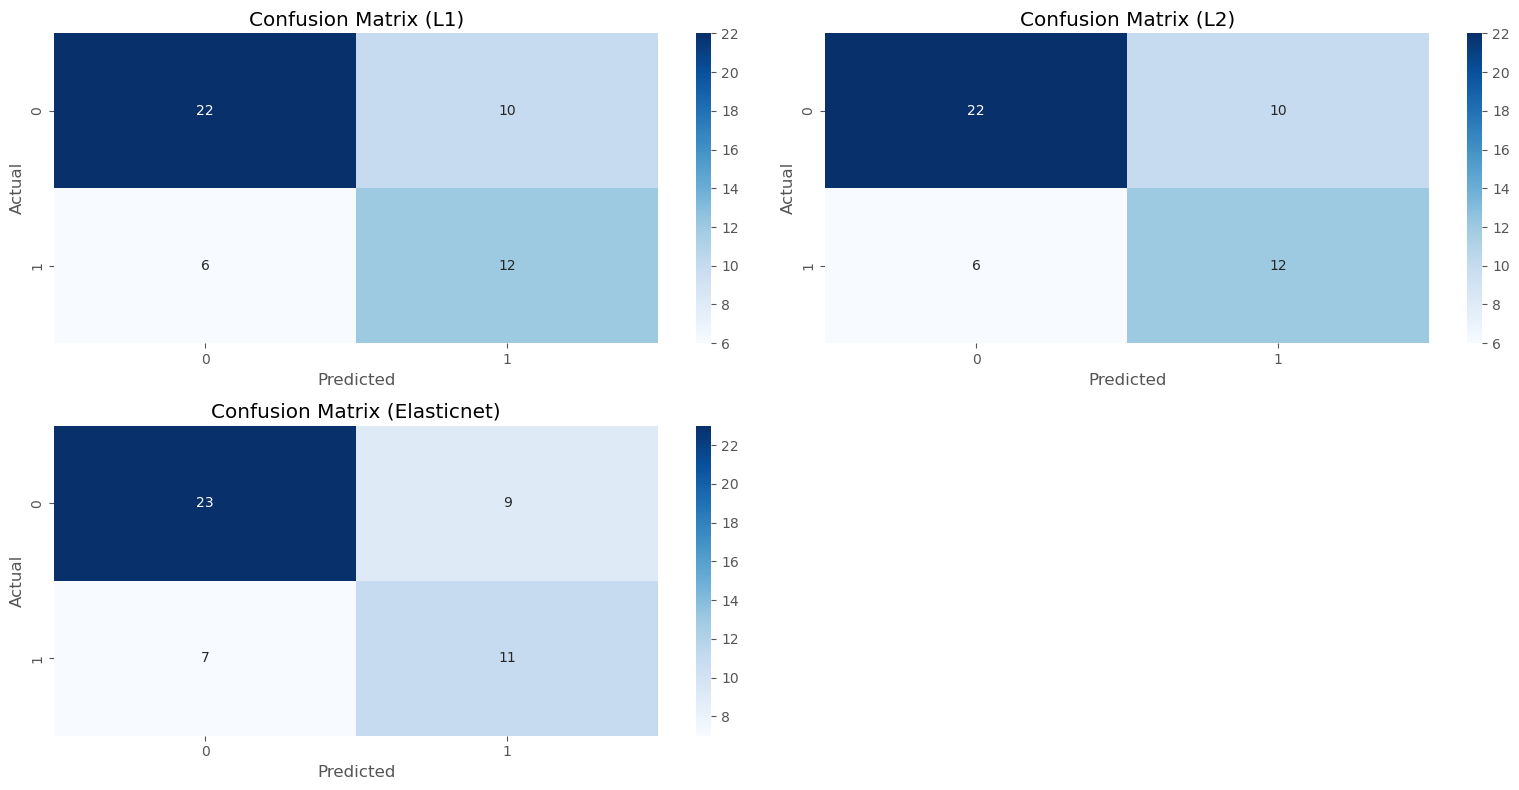

In [78]:
# Display confusion matrices in a standardized format
def display_confusion_matrices(results, methods):
    plt.figure(figsize=(16, 8))
    for i, method in enumerate(methods):
        plt.subplot(2, 2, i+1)
        sns.heatmap(results[method]['conf_matrix'], annot=True, fmt="d", cmap="Blues")
        plt.title(f"Confusion Matrix ({method.capitalize()})")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")

    plt.tight_layout()
    plt.show()

display_confusion_matrices(results, methods)

__Conclusions:__ We applied three regularization methods in logistic regression: L1 (Lasso), L2 (Ridge), and ElasticNet. L1 adds a penalty equal to the absolute value of the magnitude of coefficients, L2 adds a penalty equal to the square of the magnitude of coefficients, while ElasticNet is a hybrid approach that combines both L1 and L2 regularization that adds both penalties to the loss function, controlled by an L1_ratio. 

Upon examining the confusion matrices of logistic regression models using L1, L2, and ElasticNet regularization, each method exhibited an accuracy of 68%. Both L1 and L2 displayed similar patterns in error distribution, with 22 true negatives and 12 true positives, alongside 10 false positives and 6 false negatives. Conversely, ElasticNet showed a marginal improvement in identifying negative cases, with 23 true negatives and 11 true positives, but at the expense of increasing false negatives to 7.

The systematic testing of a range of penalty parameters revealed that while L1 and L2 achieved the best balance with a relatively high penalty parameter (C=21.54434690031882), ElasticNet required a different approach, performing optimally at a significantly lower penalty parameter (C=0.3593813663804626) with a strong preference towards L1 regularization (L1 ratio of 0.9). 

These data suggests that ElasticNet slightly prioritizes specificity over sensitivity, making it more effective in scenarios where reducing false positives is crucial. While all methods provided similar overall accuracies, ElasticNet's conservative approach to predicting positives may make it more suitable for contexts where precision is critical. The choice of regularization method should thus consider the specific implications of false positives and negatives relative to the application's requirements.